# Statistical Signal Processing Project
### Made by Valeria Tarsina, S5092582

# Use the first cell for all imports, makes everything more readable. (my opinion)

In [1]:
import numpy as np
import sympy as sp
from matplotlib.pyplot import figure, show

In [2]:
data = np.loadtxt('project_data.csv', delimiter = ',', skiprows = 1)

freq = data[:,0]
signal = data[:,1]
sig_noise = data[:,2]

mu = 0
sig = 0.05
sig_sq = 0.0025

# Fixed your plot, now it looks much better. Your signal and signa+noice are both function of frequency, that is why we plot them against frequency. Now the graph makes more sense.

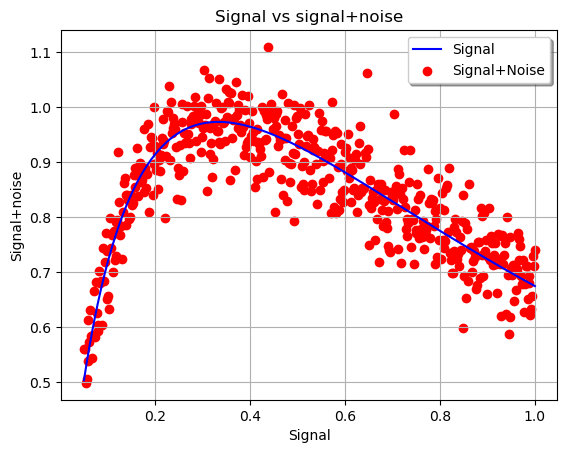

In [3]:
fig = figure()
frame = fig.add_subplot()
frame.set_xlabel('Signal')
frame.set_ylabel('Signal+noise')
frame.plot(freq, signal, color = 'b',label = "Signal")
frame.scatter(freq, sig_noise, color = 'r',label = "Signal+Noise")
frame.set_title('Signal vs signal+noise')
frame.legend(loc='best', shadow=True)
frame.grid()
show()       

# I have not checked if this is correct!!! I assume it is!

In [4]:
def s(A, nu, nu_0, a):
    return A*((nu/nu_0)**a)*((1+nu/nu_0)**(-4*a))

In [5]:
def sum_x(A, nu, nu_0, a, x):
    model = s(A, nu, nu_0, a)
    return np.sum((x -  model)**2)

In [7]:
def gradient_A(A, nu, nu_0, a, x, sig_sq):
    model = s(A, nu, nu_0, a)
    g_A = -2 * np.sum((x - model) * ((nu/nu_0)**a) * ((1 + nu/nu_0)**(-4 * a)))
    return -g_A/(2*sig_sq)

In [8]:
def gradient_nu_0(A, nu, nu_0, a, x, sig_sq):
    model = s(A, nu, nu_0, a)
    term1 = (a * model)/nu_0
    term2 = (4 * A * a * nu * ((nu/nu_0)**a) * ((1 + nu/nu_0)**(-4 * a - 1))) / nu_0**2
    g_nu_0 = 2 * np.sum((x - model) * (term1 - term2))
    return -g_nu_0/(2*sig_sq)

def gradient_alpha(A, nu, nu_0, a, x, sig_sq):
    model = s(A, nu, nu_0, a)
    term_1 = 8 * model * np.log((nu/nu_0) + 1) 
    term_2 = -2 * (np.log(nu/nu_0)) * model
    g_alpha = np.sum((x -  model) * (term_1 - term_2))
    return -g_alpha/(2*sig_sq)

In [10]:
def gradient_alpha(A, nu, nu_0, a, x, sig_sq):
    model = s(A, nu, nu_0, a)
    
    ln = np.log(nu/nu_0)
    ln_1 = np.log(1 + nu/nu_0)
    
    term_1 = 4 * A * (nu/nu_0)**a * ln_1 * (1 + (nu/nu_0))**(-4 * a)
    
    term_2 =  A * (nu/nu_0)**a * ln * (1 + (nu/nu_0))**(-4 * a)
    
    g_alpha = 2 * np.sum((x - model) * (term_1 - term_2))
    
    return -g_alpha/(2 * sig_sq)

# This is a little trick to help you compute derivatives using sympy

In [23]:
def finding_first_derivatives(symbol: sp.symbols, latex: bool = True):
    """
    Computes the first derivative of the model:
    s = A * ((nu / nu_0)**a) * ((1 + nu / nu_0)**(-4 * a))
    model = (x - s)^2,
    where x is your signal+noise

    :param symbol: _description_
    :type symbol: sp.symbols
    :param latex: _description_, defaults to True
    :type latex: bool, optional
    """
    # Define symbols
    A, nu, nu_0, a = sp.symbols("A nu nu_0 a")
    x = sp.Symbol('x', real=True) # Signal+Noise

    # Define the model s
    s = A * ((nu / nu_0)**a) * ((1 + nu / nu_0)**(-4 * a))

    # Define the log likelyhood 
    # (This might be wrong as it should be np.sum(-0.5 * (x - model) ** 2 / sigma**2)) 
    # !!!Maybe it needs to get fixed!!!
    # Looking at it again I think I am missing a minus sign somewhere, It is DEFINATELY WRONG but I am sure you can fix it!!!
    residual = x - s
    sum_x = residual**2

    # Compute the derivative of sum_x with respect to the symbol
    dsum_x_dsymbol = sp.diff(sum_x, symbol)
    
    if latex:
        print(sp.latex(dsum_x_dsymbol))
    else:
        print(dsum_x_dsymbol)

# Since the function above is wrong I will not trust these ones if I were you before I fixed the function!!!

In [12]:
print("============================ Latex Form ============================")

print("First derivative ot the log-likelihood with respect to `A`:")
finding_first_derivatives(sp.symbols("A"))

print("First derivative ot the log-likelihood with respect to `nu_0`:")
finding_first_derivatives(sp.symbols("nu_0"))

print("First derivative ot the log-likelihood with respect to `a`:")
finding_first_derivatives(sp.symbols("a"))

============================ Latex Form ============================
First derivative ot the log-likelihood with respect to `A`:
- 2 \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} \left(- A \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} + x\right)
First derivative ot the log-likelihood with respect to `nu_0`:
\left(- A \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} + x\right) \left(- \frac{8 A a \nu \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a}}{\nu_{0}^{2} \left(\frac{\nu}{\nu_{0}} + 1\right)} + \frac{2 A a \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a}}{\nu_{0}}\right)
First derivative ot the log-likelihood with respect to `a`:
\left(- A \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} + x\right) \left(- 2 A \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\righ

In [13]:
print("============================ Python Form ============================")
print("First derivative ot the log-likelihood with respect to `A`:")
finding_first_derivatives(sp.symbols("A"), False)

print("First derivative ot the log-likelihood with respect to `nu_0`:")
finding_first_derivatives(sp.symbols("nu_0"), False)

print("First derivative ot the log-likelihood with respect to `a`:")
finding_first_derivatives(sp.symbols("a"), False)

============================ Python Form ============================
First derivative ot the log-likelihood with respect to `A`:
-2*(nu/nu_0)**a*(-A*(nu/nu_0)**a/(nu/nu_0 + 1)**(4*a) + x)/(nu/nu_0 + 1)**(4*a)
First derivative ot the log-likelihood with respect to `nu_0`:
(-A*(nu/nu_0)**a/(nu/nu_0 + 1)**(4*a) + x)*(-8*A*a*nu*(nu/nu_0)**a/(nu_0**2*(nu/nu_0 + 1)*(nu/nu_0 + 1)**(4*a)) + 2*A*a*(nu/nu_0)**a/(nu_0*(nu/nu_0 + 1)**(4*a)))
First derivative ot the log-likelihood with respect to `a`:
(-A*(nu/nu_0)**a/(nu/nu_0 + 1)**(4*a) + x)*(-2*A*(nu/nu_0)**a*log(nu/nu_0)/(nu/nu_0 + 1)**(4*a) + 8*A*(nu/nu_0)**a*log(nu/nu_0 + 1)/(nu/nu_0 + 1)**(4*a))


# I have put this in a nicer form for you (You should double check this!!!)

First derivative ot the log-likelihood with respect to `A`:
$$- 2 \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} \left(- A \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} + x\right)$$
First derivative ot the log-likelihood with respect to `nu_0`:
$$\left(- A \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} + x\right) \left(- \frac{8 A a \nu \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a}}{\nu_{0}^{2} \left(\frac{\nu}{\nu_{0}} + 1\right)} + \frac{2 A a \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a}}{\nu_{0}}\right)$$
First derivative ot the log-likelihood with respect to `a`:
$$\left(- A \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} + x\right) \left(- 2 A \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} \log{\left(\frac{\nu}{\nu_{0}} \right)} + 8 A \left(\frac{\nu}{\nu_{0}}\right)^{a} \left(\frac{\nu}{\nu_{0}} + 1\right)^{- 4 a} \log{\left(\frac{\nu}{\nu_{0}} + 1 \right)}\right)$$

## This is the part you are missing out!!!

Let
$$
F(A, \nu_0, \alpha) =
\begin{pmatrix}
\frac{\partial \ln L}{\partial A} \\
\frac{\partial \ln L}{\partial \nu_0} \\
\frac{\partial \ln L}{\partial \alpha}
\end{pmatrix}
=
\begin{pmatrix}
f_1(A, \nu_0, \alpha) \\
f_2(A, \nu_0, \alpha) \\
f_3(A, \nu_0, \alpha)
\end{pmatrix}.
$$

Let 
$$\Theta = \begin{bmatrix} A & \nu_0 & \alpha \end{bmatrix}^T$$
Therefore, the Newton–Raphson iterative step can be written as
$$
\Theta_{f} = \Theta_{i} - \gamma J^{-1} F(A_i, \nu_{0i}, \alpha_i),
$$
where $0 < \gamma \leq 1$ is a hyperparameter (your learning rate), and $J$ is the Jacobian matrix (Whose inverse is also known as the $\underline{Hessian}$ matrix) given by
$$
J =
\begin{pmatrix}
\frac{\partial f_1}{\partial A} & \frac{\partial f_1}{\partial \nu_0} & \frac{\partial f_1}{\partial \alpha} \\
\frac{\partial f_2}{\partial A} & \frac{\partial f_2}{\partial \nu_0} & \frac{\partial f_2}{\partial \alpha} \\
\frac{\partial f_3}{\partial A} & \frac{\partial f_3}{\partial \nu_0} & \frac{\partial f_3}{\partial \alpha}
\end{pmatrix}.
$$

For calculating the second derivatives of the signal $s_i$ with respect to the parameters $A$, $\nu_0$, and $\alpha$, we first define:
$$
\beta_i = 4 \ln \left(1 + \frac{\nu_i}{\nu_0}\right) - \ln \left(\frac{\nu_i}{\nu_0}\right).
$$

Then we can use:
$$
\frac{\partial^2 s_i}{\partial A^2} = 0,
$$
$$
\frac{\partial^2 s_i}{\partial \nu_0^2} = s_i \frac{\alpha \left[ (1 + \alpha) \nu_0^2 - 6(1 + \alpha) \nu_i \nu_0 + 3(3\alpha - 1) \nu_i^2 \right]}{\nu_0^2 (\nu_0 + \nu_i)^2},
$$
$$
\frac{\partial^2 s_i}{\partial \alpha^2} = s_i \beta_i^2,
$$
$$
\frac{\partial^2 s_i}{\partial A \partial \alpha} = -\frac{s_i \beta_i}{A},
$$
$$
\frac{\partial^2 s_i}{\partial A \partial \nu_0} = -s_i \frac{\alpha (\nu_0 - 3\nu_i)}{A \nu_0 (\nu_0 + \nu_i)},
$$
$$
\frac{\partial^2 s_i}{\partial \alpha \partial \nu_0} = s_i \frac{\nu_0 - 3\nu_i}{\nu_0 (\nu_0 + \nu_i)} (\alpha \beta_i - 1).
$$


# Defining the components of the graident vector

In [14]:
#############################################################################################
########## You need to define each component of the gradient vector as given above ##########
#############################################################################################


def first_derivative_A():
    """
    Computes the first partial derivative of s_i with respect to A.
    """
    raise ValueError("Not Implimented!")

def first_derivative_nu0():
    """
    Computes the first partial derivative of s_i with respect to nu0.
    """
    raise ValueError("Not Implimented!")

def first_derivative_alpha():
    """
    Computes the first partial derivative of s_i with respect to alpha.
    """
    raise ValueError("Not Implimented!")

# Defining the gradient vector

In [24]:
def gradient_vec():
    """
    You need a function that computes the gradient vector.
    """
    # F components
    # f1 = ∂s/∂A
    # f2 = ∂s/∂v0
    # f3 = ∂s/∂α

    # # Assemble the gradient vector
    # F = np.array([f1, f2, f3])
    # return F
    raise ValueError("Not Implimented!")

# Defining the components of the Hessian

In [25]:
#############################################################################################
########## You need to define each component of the Jacobian matrix as given above ##########
#############################################################################################


def second_derivative_s_A2():
    """
    Computes the second partial derivative of s_i with respect to A^2.
    """
    raise ValueError("Not Implimented!")

def second_derivative_s_nu0_2():
    """
    Computes the second partial derivative of s_i with respect to nu_0^2.
    """
    raise ValueError("Not Implimented!")

def second_derivative_s_alpha2():
    """
    Computes the second partial derivative of s_i with respect to alpha^2.
    """
    raise ValueError("Not Implimented!")

def second_derivative_s_A_alpha():
    """
    Computes the mixed second partial derivative of s_i with respect to A and alpha.
    """
    raise ValueError("Not Implimented!")
def second_derivative_s_A_nu0():
    """
    Computes the mixed second partial derivative of s_i with respect to A and nu_0.
    """
    raise ValueError("Not Implimented!")

def second_derivative_s_alpha_nu0():
    """
    Computes the mixed second partial derivative of s_i with respect to alpha and nu_0.
    """
    raise ValueError("Not Implimented!")


# Defining the Hessian

In [26]:
def jacobian():
    """
    You need a function that computes the jacobian.
    """
    # J components
    # J11 = ∂²s/∂A²
    # J12 = ∂²s/∂A∂ν0
    # J13 = ∂²s/∂A∂α

    # J21 = ∂²s/∂ν0∂A
    # J22 = ∂²s/∂ν0²
    # J23 = ∂²s/∂ν0∂α

    # J31 = ∂²s/∂α∂A
    # J32 = ∂²s/∂α∂ν0
    # J33 = ∂²s/∂α²

    # # Assemble the Jacobian matrix
    # J = np.array([
    #     [J11, J12, J13],
    #     [J21, J22, J23],
    #     [J31, J32, J33]
    # ])
    # return J
    raise ValueError("Not Implimented!")

In [27]:
A_guess = 6.0
nu_0_guess = 2.0
alpha_guess = 1.0

# If you read the above, you can understand why the gradient descent implementation below doesn’t work. What you have effectively done is assume that the parameters $A$, $ν_0$, and $\alpha$ are independent of each other, which is a false assumption. Your gradient approach gets close to the correct values because your optimization algorithm (Newton-Raphson) is implemented correctly, but your underlying assumptions are incorrect. The Hessian matrix (the inverse of the Jacobian) reveals how the different parameters are correlated with each other.

In [28]:
def gradient_descent(nu, x, A_guess, nu_0_guess, alpha_guess, sig_sq, learning_rate = 1e-5, iterations = 10000, tol = 1e-6):
    #Initial params based on the initial guesses from the assignment 
    A = A_guess
    nu_0 = nu_0_guess
    a = alpha_guess
    
    for i in range(iterations):
        #print(i)
        grad_A = gradient_A(A, nu, nu_0, a, x, sig_sq)
        grad_nu_0 = gradient_nu_0(A, nu, nu_0, a, x, sig_sq)
        grad_alpha = gradient_alpha(A, nu, nu_0, a, x, sig_sq)
    
        #print(f"Iteration {i+1}: grad_A = {grad_A}, grad_nu_0 = {grad_nu_0}, grad_alpha = {grad_alpha}")
    
        A_new = A - learning_rate * grad_A
        nu_0_new = nu_0 - learning_rate * grad_nu_0
        alpha_new = a - learning_rate * grad_alpha
    
    
        if np.abs(A_new - A) < tol and np.abs(nu_0_new - nu_0) < tol and np.abs(alpha_new - a) < tol:
            print(f"Converged after {i+1} iterations")
            break
    
        A = A_new
        nu_0 = nu_0_new
        a = alpha_new
    

    return A, nu_0, a 

# I have not looked passed this point

In [29]:
A_true, nu_0_true, alpha_true = gradient_descent(freq, sig_noise, A_guess, nu_0_guess, alpha_guess, sig_sq)
print(f"Found parameters: A = {A_true}, nu_0 = {nu_0_true}, alpha = {alpha_true}")

Found parameters: A = 5.662516990118824, nu_0 = 2.3796537585257824, alpha = 5.600053458552811


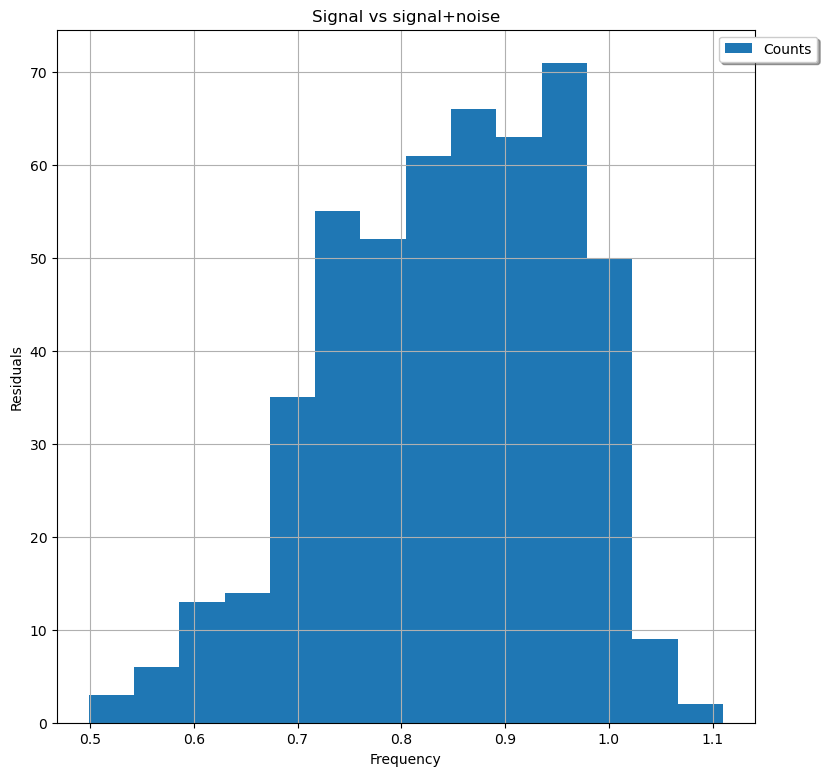

In [30]:
def residuals(A, nu, nu_0, alpha, sig_noise):
    model = s(A, nu, nu_0, alpha)
    resids = np.abs(sig_noise - model)
    return resids

residuals = residuals(A_true, freq, nu_0_true, alpha_true, sig_noise)


fig = figure(figsize=(9,9))
frame = fig.add_subplot(1, 1, 1)
frame.set_xlabel('Frequency')
frame.set_ylabel('Residuals')
#frame.scatter(freq, residuals, color = 'b',label = f"Data points", s=5)
hist = frame.hist(residuals, bins = 'fd', label = 'Counts')
frame.set_title(f'Signal vs signal+noise')
frame.legend(loc='best', bbox_to_anchor=(1.1, 1),  shadow=True, ncol=1)
frame.grid()
show()       